In [7]:
include("../src/Particles.jl")

using .Particles
using Distributions
using DataStructures
using StatsBase
using Plots, StatsPlots

import .Particles as PF

┌ Warning: backend `GR` is not installed.
└ @ Plots ~/.julia/packages/Plots/7VQ5h/src/backends.jl:43


In [19]:
# ランダム時系列データ生成
function random_walk(n, σ)
    x = randn(n) * σ
    return cumsum(x)
end

# サンプルデータ生成
y = random_walk(100, 1.0)

# 粒子数
n_particles = 10000

# 状態関数
f = x -> begin
    x
end
# 観測関数
h = x -> begin
    x
end

# モデル定義
model = Particles.ParticleFilter(
    n_particles=n_particles, 
    n_particle_dim=1,
    n_obs_dim=1,
    lags=20,
    f=f, 
    h=h, 
    init_particle_dists=Dict(:state => Normal(0, 2.0)),
    sys_noise_dist=Cauchy(0, 0.5),
    obs_noise_dist=Normal(0, sqrt(0.0001))
)

ParticleFilter{Cauchy{Float64}, Normal{Float64}}(10000, 1, 1, 20, var"#19#20"(), var"#21#22"(), Dict{Symbol, Normal{Float64}}(:state => Normal{Float64}(μ=0.0, σ=2.0)), Cauchy{Float64}(μ=0.0, σ=0.5), Normal{Float64}(μ=0.0, σ=0.01))

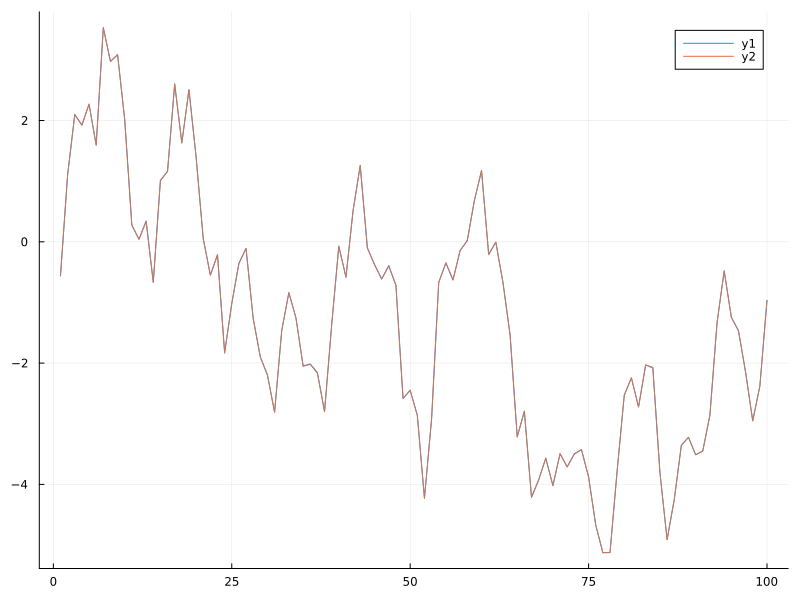

In [20]:
results = Particles.fit(model, y)
yhat = mean.(results.particle[:smoothed])
plot(y, size=(800,600)); plot!(yhat)